In [1]:
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from icecream import ic
import matplotlib.pyplot as plt
from bokeh.palettes import Spectral4
from bokeh.models import (
    BoxSelectTool,
    Circle,
    HoverTool,
    MultiLine,
    NodesAndLinkedEdges,
    TapTool,
    ColumnDataSource,
    LabelSet,
)
from bokeh.plotting import from_networkx
from bokeh.transform import linear_cmap
from typing import List, Dict
import pandas as pd
import itertools
import collections
from collections import Counter
from nltk.util import bigrams
import math


In [2]:
df = pd.read_pickle("topic_model/corona_songs_preprocessed.pkl")

In [11]:
df

,raw_text,prepared_BERT,BERT_sent_scores,BERT_emot_scores,cleaned_text,lemmas,nn_adj
0,[Verse 1]\nWhen I grew up my family was very v...,When I grew up my family was very very poor Bu...,"{'NEG': 0.0718955397605896, 'NEU': 0.901947319...","{'others': 0.6933397650718689, 'joy': 0.005929...",when i grew up my family was very very poor bu...,"[grow, family, poor, scrap, somehow, keep, hun...","[family, poor, hunger, door, mean, time, y, da..."
1,\n[Chorus]\nI remember love in the city\nLivin...,I remember love in the city Living for the lat...,"{'NEG': 0.004150602966547012, 'NEU': 0.1218134...","{'others': 0.9238672256469727, 'joy': 0.008093...",i remember love in the city living for the lat...,"[remember, love, city, live, late, night, life...","[love, city, late, night, life, good, time, ba..."
2,"[Verse 1]\nSomewhere in China, a bat took a le...","Somewhere in China, a bat took a leak Pissed a...","{'NEG': 0.9624901413917542, 'NEU': 0.034668304...","{'others': 0.9016407132148743, 'joy': 0.005615...",somewhere in china a bat took a leak pissed al...,"[somewhere, china, bat, take, leak, piss, unco...","[china, bat, leak, uncooked, meat, dude, sick,..."
3,[Verse 1]\nSocial life has come and passed\nQu...,Social life has come and passed Quarantine is ...,"{'NEG': 0.929228663444519, 'NEU': 0.0670251473...","{'others': 0.009335007518529892, 'joy': 0.0023...",social life has come and passed quarantine is ...,"[social, life, come, pass, quarantine, stay, h...","[social, life, quarantine, stay, home, corona,..."
4,[Verse 1]\nAs I walk this wicked world\nSearch...,As I walk this wicked world Searching for ligh...,"{'NEG': 0.05112225189805031, 'NEU': 0.87072134...","{'others': 0.8907967209815979, 'joy': 0.007419...",as i walk this wicked world searching for ligh...,"[walk, wicked, world, search, light, darkness,...","[wicked, world, light, darkness, insanity, hop..."
...,...,...,...,...,...,...,...
346,[Verse 1]\nYou're broken down and tired\nOf li...,You're broken down and tired Of living life on...,"{'NEG': 0.004515166860073805, 'NEU': 0.4139312...","{'others': 0.9266726970672607, 'joy': 0.064531...",you re broken down and tired of living life on...,"[break, tired, live, life, merry, go, round, f...","[tired, life, merry, go, fighter, mountain, mo..."
347,"[Chorus]\nQuarantine, gotta quarantine\nQuaran...","Quarantine, gotta quarantine Quarantine, gotta...","{'NEG': 0.4116404056549072, 'NEU': 0.568241417...","{'others': 0.0993264839053154, 'joy': 0.004988...",quarantine gotta quarantine quarantine gotta q...,"[quarantine, get, quarantine, quarantine, get,...","[quarantine, quarantine, quarantine, quarantin..."
348,[Verse 1]\nThere comes a time when we heed a c...,There comes a time when we heed a certain call...,"{'NEG': 0.0012957989238202572, 'NEU': 0.035596...","{'others': 0.8936835527420044, 'joy': 0.035033...",there comes a time when we heed a certain call...,"[come, time, heed, certain, call, world, come,...","[time, certain, call, world, people, time, han..."
349,[Intro: spoken]\n\n[Verse 1]\nOnce upon a time...,Once upon a time in the city of Wuhan Virus ex...,"{'NEG': 0.8351588845252991, 'NEU': 0.159016519...","{'others': 0.950640857219696, 'joy': 0.0125106...",once upon a time in the city of wuhan virus ex...,"[upon, time, city, wuhan, virus, expansion, be...","[time, city, wuhan, virus, expansion, mass, is..."


In [3]:
lemmas = df["nn_adj"].tolist()

In [4]:
terms_bigram = [list(bigrams(tweet)) for tweet in lemmas]

In [5]:
bigram = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigram)
bigrams_df = pd.DataFrame(bigram_counts.most_common(30), columns=["bigram", "count"])
bigrams_df

,bigram,count
0,"(corona, corona)",229
1,"(toilet, paper)",153
2,"(hand, hand)",130
3,"(quarantine, quarantine)",108
4,"(wash, wash)",66
5,"(covid, covid)",52
6,"(mask, mask)",48
7,"(bored, bored)",42
8,"(social, distance)",41
9,"(quarantine, corona)",39


In [6]:
word_freq = Counter(lemma for tweet in lemmas for lemma in set(tweet))
w_freq_df = pd.DataFrame(word_freq.items(), columns=["word", "frequency"]).sort_values(by="frequency", ascending=False)

In [7]:
w_freq_df

,word,frequency
66,hand,163
29,time,141
3,day,117
103,corona,108
95,home,100
...,...,...
772,ruby,1
768,cricket,1
766,bunker,1
2249,theater,1


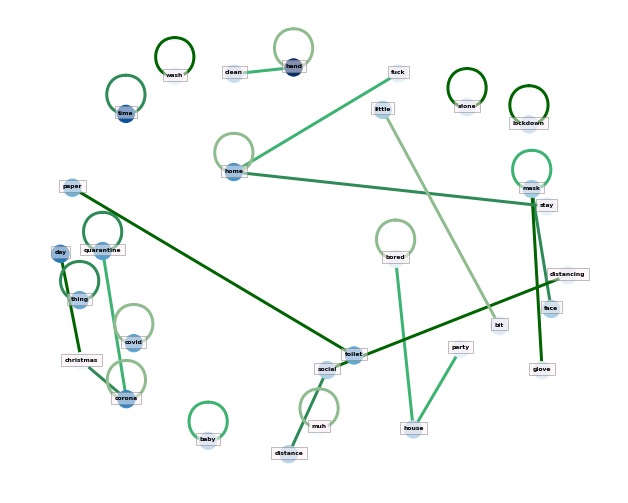

In [9]:
palette_nodes = ["#8fbc8f", "#3cb371", "#2e8b57", "#006400"]
d = bigrams_df.set_index("bigram").T.to_dict("records")
G = nx.Graph()

for key, value in d[0].items():
    G.add_edge(key[0], key[1], weight=(value))

fig, ax = plt.subplots(figsize=(11, 9))
pos = nx.spring_layout(G, k=4)

d = w_freq_df.to_dict(orient="split")["data"]
d = [(int(word[1])) * 2 for node in G.nodes() for word in d if word[0] == node]

nx.draw_networkx(G, pos, font_size=10, width=3, cmap="Blues", edge_color=palette_nodes, node_color=d, with_labels=False, ax=ax,)

for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x,
            y,
            s=key,
            bbox=dict(facecolor="#FFF0F5", alpha=0.5, edgecolor="grey", pad=3.5),
            horizontalalignment="center",
            weight="bold",
            fontsize=6,
        )

fig.patch.set_visible(False)
ax.axis("off")
plt.savefig("nn_adj.png", dpi=150)

In [10]:
def scale(data):
    """
    Calculates logarithm base 2 and multiplies the result by 3.
    Args:
        data (Dict[int]): A ditctionary with values.
    Returns:
        Dict[int]: The input dictonary with updated values.
    """

    for key, value in data.items():
        data[key] = (math.log2(value)) * 3

    return data

In [11]:
freq_dict = w_freq_df.to_dict(orient="split")["data"]
co_occurence = dict(bigrams_df.values)

In [12]:
def bigram_freq(freq: Dict[str, int], G, scale: bool) -> Dict[str, int]:
    """
    Creates a dictionary of words (present in bigrams) and their frequencies.
    Args:
        freq (Dict[str, int]): A dictionary with all words from the data corpus and their frequency values.
        G: A Networkx graph.
        scale (bool): If true, the logarithm of frequency values will be calculated.
    Returns:
        Dict[str, int]: The dictionary containg words from bigrams and their frequencies.
    """

    freq_dict = {}

    for node in G.nodes():
        for word in freq:
            if word[0] == node:
                if scale == True:
                    freq_dict[word[0]] = (math.log2(word[1])) * 3
                else:
                    freq_dict[word[0]] = word[1]
    return freq_dict

In [13]:
G = nx.Graph()

for key, value in co_occurence.items():
    G.add_edge(key[0], key[1], weight=(value * 5))

pos = nx.spring_layout(G, k=4)

scaled_co_occurence = scale(co_occurence)
freq = bigram_freq(freq_dict, G, scale=True)

In [13]:
freq

{'wash': 20.611094158750213,
 'hand': 22.046184462693233,
 'stay': 21.715214217975237,
 'home': 21.23044679115249,
 'corona': 20.264662506490403,
 'toilet': 19.328830487546185,
 'paper': 18.96578428466209,
 'quarantine': 20.460536887245564,
 'inside': 18.68645607148764,
 'six': 16.75488750216347,
 'foot': 16.931568569324174,
 'touch': 19.176952268336283,
 'face': 18.262388523751017,
 'get': 23.756589711823786,
 'shake': 14.101319154423276,
 'away': 19.427200292899194,
 'feel': 20.22440095920344,
 'like': 21.325573370334507,
 'social': 17.183761363689598,
 'distance': 17.101319154423276,
 'go': 23.862588931160623,
 'fuck': 14.101319154423276,
 'bored': 11.422064766172813,
 'leave': 19.07265601385425,
 'house': 16.75488750216347,
 'fight': 15.743782540330756,
 'virus': 19.709566824992844,
 'wear': 16.378294855911893,
 'mask': 17.79221201268866,
 'everybody': 16.176952268336283,
 'self': 14.422064766172811,
 'isolate': 13.378294855911893,
 'alright': 14.264662506490405,
 'covid': 19.47555

In [14]:
scaled_co_occurence

{('wash', 'hand'): 25.511477213987252,
 ('stay', 'home'): 22.402816650248994,
 ('corona', 'corona'): 22.402816650248994,
 ('toilet', 'paper'): 21.772163528077957,
 ('quarantine', 'quarantine'): 20.536470152833125,
 ('wash', 'wash'): 20.264662506490403,
 ('stay', 'inside'): 20.183761363689598,
 ('hand', 'wash'): 18.387849050834898,
 ('six', 'foot'): 17.93183977049975,
 ('touch', 'face'): 17.101319154423276,
 ('corona', 'get'): 17.017276025914484,
 ('home', 'home'): 16.75488750216347,
 ('shake', 'shake'): 16.57068586817104,
 ('stay', 'away'): 16.475559288989025,
 ('home', 'stay'): 16.278794264106295,
 ('feel', 'like'): 16.07265601385425,
 ('social', 'distance'): 16.07265601385425,
 ('hand', 'get'): 15.856206656586746,
 ('go', 'go'): 15.856206656586746,
 ('get', 'corona'): 15.856206656586746,
 ('stay', 'fuck'): 15.856206656586746,
 ('bored', 'bored'): 15.856206656586746,
 ('leave', 'house'): 15.509775004326936,
 ('fight', 'virus'): 15.387849050834898,
 ('wear', 'mask'): 15.387849050834898

In [14]:
def plot_bigrams(
    G,
    word_freq,
    co_occurence,
    pos,
    palette_nodes,
    palette_edges,
    title: str,
):
    """
    Plots a node graph.
    Args:
        G: A Networkx graph.
        word_freq (Dict[str, int]):  A dictionary of bigram members and their frequencies across the dataset.
        co_occurence (Dict[str, int]): A dictionaty of bigrams and their co-occurence values.
        pos (Dict[int]): A dictionary of positions keyed by a node.
        palette_nodes (List[str]): A colour palette for the nodes.
        palette_edges (List[str]):  A colour palette for the edges.
        title (str): The title of the node graph.
    Returns:
        plot: The node graph.
    """

    from bokeh.plotting import figure

    nx.set_node_attributes(G, name="freq", values=word_freq)
    nx.set_edge_attributes(G, name="co_occurence", values=co_occurence)

    node_highlight_color = Spectral4[1]
    edge_highlight_color = Spectral4[2]

    color_nodes = "freq"
    color_edges = "co_occurence"

    plot = figure(
        tools="pan,wheel_zoom,save,reset", active_scroll="wheel_zoom", title=title
    )

    plot.title.text_font_size = "20px"

    plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

    network_graph = from_networkx(G, pos, scale=10, center=(0, 0))

    min_col_val_node = min(network_graph.node_renderer.data_source.data[color_nodes])
    max_col_val_node = max(network_graph.node_renderer.data_source.data[color_nodes])

    min_col_val_edge = min(network_graph.edge_renderer.data_source.data[color_edges])
    max_col_val_edge = max(network_graph.edge_renderer.data_source.data[color_edges])

    network_graph.node_renderer.glyph = Circle(
        size=40,
        fill_color=linear_cmap(
            color_nodes, palette_nodes, min_col_val_node, max_col_val_node
        ),
        fill_alpha=1,
    )

    network_graph.node_renderer.hover_glyph = Circle(
        size=5, fill_color=node_highlight_color, line_width=3
    )

    network_graph.node_renderer.selection_glyph = Circle(
        size=5, fill_color=node_highlight_color, line_width=5
    )

    network_graph.edge_renderer.glyph = MultiLine(
        line_alpha=1,
        line_color=linear_cmap(
            color_edges, palette_edges, min_col_val_edge, max_col_val_edge
        ),
        line_width=4,
    )

    network_graph.edge_renderer.selection_glyph = MultiLine(
        line_color=edge_highlight_color, line_width=4
    )
    network_graph.edge_renderer.hover_glyph = MultiLine(
        line_color=edge_highlight_color, line_width=4
    )

    network_graph.selection_policy = NodesAndLinkedEdges()
    network_graph.inspection_policy = NodesAndLinkedEdges()

    plot.renderers.append(network_graph)

    x, y = zip(*network_graph.layout_provider.graph_layout.values())
    node_labels = list(G.nodes())
    source = ColumnDataSource(
        {"x": x, "y": y, "name": [node_labels[i] for i in range(len(x))]}
    )
    labels = LabelSet(
        x="x",
        y="y",
        text="name",
        source=source,
        background_fill_color="pink",
        text_font_size="24px",
        background_fill_alpha=0.3,
    )

    plot.renderers.append(labels)

    return plot

In [15]:
from bokeh.plotting import figure, output_file, save
color_palette_nodes = ["#E0FFFF", "#bcdfeb", "#62b4cf", "#1E90FF"]
color_palette_edges = ["#8fbc8f", "#3cb371", "#2e8b57", "#006400"]

fig = plot_bigrams(
            G,
            freq,
            scaled_co_occurence,
            pos,
            color_palette_nodes,
            color_palette_edges,
            "Bigrams",
        )

save(fig, filename="nn_adj.html")

/home/kate/CoronaMusic/src/pipelines/bert/lib/python3.9/site-packages/bokeh/io/saving.py:142: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/home/kate/CoronaMusic/src/pipelines/bert/lib/python3.9/site-packages/bokeh/io/saving.py:154: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/home/kate/CoronaMusic/lyrics/nn_adj.html'